## Импорт библиотек, загрузка данных и общий просмотр

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import numpy as np
import warnings
warnings.simplefilter("ignore")
import math

In [ ]:
# просмотр, где находится каталог с файлами на COLAB
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# получение доступа к каталогу и уточнение названия папок
import os
os.listdir('/content/drive/My Drive/Colab Notebooks/Яндекс/Проект 4 Смарт vs Ультра/ДАННЫЕ')

['calls.csv', 'internet.csv', 'messages.csv', 'tariffs.csv', 'users.csv']

In [ ]:
# считать данные csv и присвоить им имя
data_calls = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Яндекс/Проект 4 Смарт vs Ультра/ДАННЫЕ/calls.csv')
data_internet = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Яндекс/Проект 4 Смарт vs Ультра/ДАННЫЕ/internet.csv')
data_messages = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Яндекс/Проект 4 Смарт vs Ультра/ДАННЫЕ/messages.csv')
data_tariffs = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Яндекс/Проект 4 Смарт vs Ультра/ДАННЫЕ/tariffs.csv')
data_users = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Яндекс/Проект 4 Смарт vs Ультра/ДАННЫЕ/users.csv')

In [ ]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [ ]:
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [ ]:
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [ ]:
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


#### Вывод

1. data_internet содержит столбец "Unnamed: 0" дублирующий индексы его целесообразно удалить.
2. data_users содержит столбец "churn_date" с пропусками, необходимо посчитать их долю, если она менее 1 % - удалить.

## Предобработка

### Обработка таблицы data_users

In [ ]:
# вывод общей информации
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


* user_id     - идентификатор;
* age         - возраст;
* churn_date  - дата смены тарифа;
* city        - город регистрации;
* first_name  - имя;
* last_name   - фамилия;
* reg_date    - дата регистрации;
* tariff      - тариф.

In [ ]:
# вывод описательной статистики
data_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [ ]:
# подсчет пропущенных данные
data_users.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [ ]:
# вывод уникальных значений
data_users['churn_date'].unique()

array([nan, '2018-10-05', '2018-12-18', '2018-11-21', '2018-10-03',
       '2018-10-14', '2018-12-09', '2018-12-11', '2018-12-26',
       '2018-08-31', '2018-12-03', '2018-12-23', '2018-11-07',
       '2018-12-16', '2018-12-20', '2018-11-30', '2018-12-21',
       '2018-08-17', '2018-09-02', '2018-10-04', '2018-11-13',
       '2018-11-22', '2018-10-28', '2018-11-26', '2018-11-27',
       '2018-11-16', '2018-10-27', '2018-12-30', '2018-09-27',
       '2018-12-25', '2018-12-14', '2018-12-24', '2018-09-26',
       '2018-10-25'], dtype=object)

In [ ]:
# доля пропущенных значений
data_users['churn_date'].isna().mean()

0.924

#### Вывод:

1. Доля пропущенных значений в столбце data_users['churn_date'] порядка 0.92. Это очень много. Тип - дата, заполнить средними значениями не получится. Скорее всего, данных о смене тарифа нет, так как им все еще пользуются. Целесообразно заполнить нулями.
2. Столбец "reg_date" и "churn_date" перевести в тип дата.

In [ ]:
# перевод столбца в формат даты
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format = '%Y-%m-%d')

In [ ]:
# перевод столбца в формат даты
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format = '%Y-%m-%d')

In [ ]:
# зануление пропусков
data_users['churn_date'] = data_users['churn_date'].fillna(0)

In [ ]:
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,0,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,0,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,0,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,0,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [ ]:
# вывод общей информации
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  500 non-null    object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [ ]:
# посчитать пропущенные данные
data_users.isnull().sum()

user_id       0
age           0
churn_date    0
city          0
first_name    0
last_name     0
reg_date      0
tariff        0
dtype: int64

### Обработка таблицы data_tariffs

In [ ]:
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
# вывод общей информации
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


* messages_included      - пакет сообщений;
* mb_per_month_included  - пакет мегабайт в месяц;
* minutes_included       - пакет минут;
* rub_monthly_fee        - ежемесячная плата руб.;
* rub_per_gb             - цена за мегабайты сверх тарифного пакета;
* rub_per_message        - цена за сообщения сверх тарифного пакета;
* rub_per_minute         - цена за минуты сверх тарифного пакета;
* tariff_name            - тариф.

#### Вывод:

1. Типы данных соответствуют.
2. Пропуски отсутствуют.

### Обработка таблицы data_messages

In [ ]:
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [ ]:
# вывод общей информации
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


#### Вывод:

1. Пропуски отсутствуют.
2. К столбцу "message_date" необходимо применить тип данных - дата.

In [ ]:
# переведем столбец в формат даты
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format = '%Y-%m-%d')

In [ ]:
# вывод общей информации
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


### Обработка таблицы data_internet

In [ ]:
data_internet.tail()

,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


In [ ]:
# вывод общей информации
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


* id            - идентификатор сессии;
* mb_used       - трафик юзера в сессии;
* session_date  - дата сесии;
* user_id       - идентификатор.

#### Вывод:

1. Пропуски отсутствуют.
2. К столбцу "session_date" необходимо применить тип данных - дата.
3. Нужно удалить столбец, дублирующий индексы.


In [ ]:
# удаление столбца
data_internet = data_internet.drop(['Unnamed: 0'], axis=1)

In [ ]:
# переведем столбец в формат даты
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format = '%Y-%m-%d')

In [ ]:
data_internet.tail()

,id,mb_used,session_date,user_id
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499
149395,1499_156,544.37,2018-10-26,1499


In [ ]:
# вывод общей информации
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


### Обработка таблицы data_calls

In [ ]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [ ]:
# вывод общей информации
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


* id         - идентификатор сессии;
* call_date  - дата сесии звонка;
* duration   - продолжительность;
* user_id    - идентификатор.

#### Вывод:

1. Пропуски отсутствуют.
2. К столбцу "call_date" необходимо применить тип данных - дата.

In [ ]:
# переведем столбец в формат даты
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format = '%Y-%m-%d')

In [ ]:
# вывод общей информации
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [ ]:
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,0,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,0,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,0,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,0,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [ ]:
# подсчет доли дубликатов
print(data_calls.duplicated().sum() / len(data_calls) * 100)
print(data_internet.duplicated().sum() / len(data_internet) * 100)
print(data_messages.duplicated().sum() / len(data_messages) * 100)
data_users['city'] = data_users['city'].str.lower()
data_users['first_name'] = data_users['first_name'].str.lower()
data_users['last_name'] = data_users['last_name'].str.lower()
print(data_users.duplicated().sum() / len(data_users) * 100)

0.0
0.0
0.0
0.0


### Вывод

**В результате предобработки:**

1. Установлено, что пропущенных значений в столбце data_users['churn_date'] порядка 0.92. Это очень много. Тип - дата, заполнить средними значениями не получится. Пропуски вызваны скорее всего тем, что данных о смене тарифа - "НЕТ" и им все еще пользуются. Целесообразно заполнить нулями.
2. Столбец "reg_date" и "churn_date" переведен в тип дата.
3. К столбцу "message_date" применен тип данных - дата.
4. К столбцу "session_date" применен тип данных - дата.
5. Удален столбец, дублирующий индексы.
6. К столбцу "call_date" применен тип данных - дата.


## Подготовка данных

### Подсчет количества сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя

In [ ]:
# проверим по датам, сколько месяцев охватывают данные
print(data_calls['call_date'].min(), data_calls['call_date'].max())

2018-01-01 00:00:00 2018-12-31 00:00:00


In [ ]:
data_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [ ]:
# округление до минут
data_calls['duration'] = np.ceil(data_calls['duration'])

In [ ]:
# столбец месяца
data_calls['month'] = data_calls['call_date'].dt.month

In [ ]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


In [ ]:
# сводная таблица
data_calls_pivot = pd.pivot_table(data_calls, index=['user_id', 'month'], values='duration', aggfunc=['count','sum'])

In [ ]:
# переименование столбцов сводной таблицы
data_calls_pivot.columns = ['calls_count', 'all_calls_duration']

In [ ]:
data_calls_pivot.head()

calls_count  all_calls_duration
user_id month                                 
1000    5               22               159.0
        6               43               172.0
        7               47               340.0
        8               52               408.0
        9               58               466.0

### Подсчет количества отправленных сообщений по месяцам для каждого пользователя

In [ ]:
# проверим по датам, сколько месяцев охватывают данные
print(data_messages['message_date'].min(), data_messages['message_date'].max())

2018-01-02 00:00:00 2018-12-31 00:00:00


In [ ]:
# столбец месяца
data_messages['month'] = data_messages['message_date'].dt.month

In [ ]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


In [ ]:
# сводная таблица
data_messages_pivot = pd.pivot_table(data_messages, index=['user_id', 'month'], values='id', aggfunc='count')

In [ ]:
# переименование столбца сводной таблицы
data_messages_pivot.columns = ['messages_count']

In [ ]:
data_messages_pivot.head()

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57

### Подсчет объема израсходованного интернет-трафика по месяцам для каждого пользователя

In [ ]:
data_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [ ]:
# проверим по датам, сколько месяцев охватывают данные
print(data_internet['session_date'].min(), data_internet['session_date'].max())

2018-01-01 00:00:00 2018-12-31 00:00:00


In [ ]:
# столбец месяца
data_internet['month'] = data_internet['session_date'].dt.month

In [ ]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
 4   month         149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [ ]:
# сводная таблица
data_internet_pivot = pd.pivot_table(data_internet, index=['user_id', 'month'], values='mb_used', aggfunc='sum')

In [ ]:
# переименование столбца сводной таблицы
data_internet_pivot.columns = ['all_mb_used']

In [ ]:
data_internet_pivot.head()

all_mb_used
user_id month             
1000    5          2253.49
        6         23233.77
        7         14003.64
        8         14055.93
        9         14568.91

### Подсчет помесячной выручки с каждого пользователя

#### Общая информация

In [ ]:
data_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,0,краснодар,рафаил,верещагин,2018-05-25,ultra
1,1001,41,0,москва,иван,ежов,2018-11-01,smart
2,1002,59,0,стерлитамак,евгений,абрамович,2018-06-17,smart
3,1003,23,0,москва,белла,белякова,2018-08-17,ultra
4,1004,68,0,новокузнецк,татьяна,авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,0,иркутск,авксентий,фокин,2018-08-28,ultra
496,1496,36,0,вологда,трифон,блохин,2018-01-27,smart
497,1497,32,0,челябинск,каролина,агеева,2018-10-09,smart
498,1498,68,2018-10-25 00:00:00,владикавказ,всеволод,акимчин,2018-07-19,smart


In [ ]:
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
# разделение общей таблицы 'data_users_smart' по двум тарифам "smart" и "ultra"
data_users_smart = data_users.query('tariff == "smart"')
data_users_ultra = data_users.query('tariff == "ultra"')

In [ ]:
data_users_smart

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
1,1001,41,0,москва,иван,ежов,2018-11-01,smart
2,1002,59,0,стерлитамак,евгений,абрамович,2018-06-17,smart
5,1005,67,0,набережные челны,афанасий,горлов,2018-01-25,smart
6,1006,21,0,ульяновск,леонид,ермолаев,2018-02-26,smart
7,1007,65,0,москва,юна,березина,2018-04-19,smart
...,...,...,...,...,...,...,...,...
494,1494,62,0,омск,ренат,андропов,2018-08-17,smart
496,1496,36,0,вологда,трифон,блохин,2018-01-27,smart
497,1497,32,0,челябинск,каролина,агеева,2018-10-09,smart
498,1498,68,2018-10-25 00:00:00,владикавказ,всеволод,акимчин,2018-07-19,smart


In [ ]:
data_users_ultra

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,0,краснодар,рафаил,верещагин,2018-05-25,ultra
3,1003,23,0,москва,белла,белякова,2018-08-17,ultra
4,1004,68,0,новокузнецк,татьяна,авдеенко,2018-05-14,ultra
13,1013,36,0,иваново,борис,андреенко,2018-11-14,ultra
16,1016,58,0,омск,марица,сазонова,2018-11-21,ultra
...,...,...,...,...,...,...,...,...
476,1476,50,0,москва,валентина,семенова,2018-04-30,ultra
485,1485,34,0,киров,таисия,сухова,2018-12-29,ultra
491,1491,56,0,челябинск,радислав,андрейкин,2018-04-25,ultra
493,1493,71,0,красноярск,таисия,ахматулина,2018-11-24,ultra


In [ ]:
# функция удаления отрицательных значений полученных, 
# при расчете перерасхода пакета услуг (в том случае, если его не было (перерасхода))

def drop_minus(data):
    
    warnings.simplefilter("ignore")
    for i in range(len(data)):
        if data['overrun'][i] < 0:
            data['overrun'][i] = 0
    return data

#### Перерасход пакета интернета

In [ ]:
# reset индексов (user_id, month) сводной таблицы
data_internet_pivot = data_internet_pivot.reset_index()

In [ ]:
data_internet_pivot

,user_id,month,all_mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


In [ ]:
# мердж таблицы data_internet_pivot (расход пакета интернета по месяцам и каждому пользователю соответственно)
# с таблицами по каждому тарифу (data_users_smart, data_users_ultra)
data_internet_pivot_smart = data_users_smart.merge(data_internet_pivot,  how = 'inner', on='user_id')
data_internet_pivot_ultra = data_users_ultra.merge(data_internet_pivot,  how = 'inner', on='user_id')

In [ ]:
# формируем столбец 'overrun' (перерасход интернета)
data_internet_pivot_smart['overrun'] = data_internet_pivot_smart['all_mb_used'] - 15360
data_internet_pivot_ultra['overrun'] = data_internet_pivot_ultra['all_mb_used'] - 30720

In [ ]:
data_internet_pivot_smart['overrun'] = data_internet_pivot_smart['overrun'].fillna(0)
data_internet_pivot_ultra['overrun'] = data_internet_pivot_ultra['overrun'].fillna(0)

In [ ]:
data_internet_pivot_smart = drop_minus(data_internet_pivot_smart)
data_internet_pivot_ultra = drop_minus(data_internet_pivot_ultra)

In [ ]:
data_internet_pivot_smart['overrun'] = data_internet_pivot_smart['overrun']/1024
data_internet_pivot_ultra['overrun'] = data_internet_pivot_ultra['overrun']/1024

In [ ]:
# округление до мегабайт
data_internet_pivot_smart['overrun'] = data_internet_pivot_smart['overrun'].apply(lambda x: math.ceil(x))
data_internet_pivot_ultra['overrun'] = data_internet_pivot_ultra['overrun'].apply(lambda x: math.ceil(x))

In [ ]:
# расчет стоимости интернета сверх пакета интернета по месяцам и соответствующему тарифу
data_internet_pivot_smart['internet_revenue'] = data_internet_pivot_smart['overrun'] * 200
data_internet_pivot_ultra['internet_revenue'] = data_internet_pivot_ultra['overrun'] * 150

In [ ]:
# сохраняем данные в переменных (internet_smart, internet_ultra) для расчетов в дальнейшем
internet_smart = data_internet_pivot_smart
internet_ultra = data_internet_pivot_ultra

#### Перерасход пакета сообщений

In [ ]:
# reset индексов (user_id, month) сводной таблицы
data_messages_pivot = data_messages_pivot.reset_index()

In [ ]:
data_messages_pivot.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [ ]:
# левый мердж таблицы data_messages_pivot (расход пакета сообщений по месяцам и каждому пользователю соответственно)
# с таблицами по каждому тарифу (data_users_smart, data_users_smart)
data_messages_pivot_smart = data_users_smart.merge(data_messages_pivot,  how = 'inner', on='user_id')
data_messages_pivot_ultra = data_users_ultra.merge(data_messages_pivot,  how = 'inner', on='user_id')

In [ ]:
# формируем столбец 'overrun' (перерасход сверх пакета сообщений) по каждому пользователю
data_messages_pivot_smart['overrun'] = data_messages_pivot_smart['messages_count'] - 50
data_messages_pivot_ultra['overrun'] = data_messages_pivot_ultra['messages_count'] - 1000

In [ ]:
data_messages_pivot_smart = drop_minus(data_messages_pivot_smart)
data_messages_pivot_ultra = drop_minus(data_messages_pivot_ultra)

In [ ]:
# расчет стоимости сообщений сверх пакета сообщений по месяцам и соответствующему тарифу
data_messages_pivot_smart['messages_revenue'] = data_messages_pivot_smart['overrun'] * 3
data_messages_pivot_ultra['messages_revenue'] = data_messages_pivot_ultra['overrun'] * 1

In [ ]:
# сохраняем данные в переменных (messages_smart, messages_ultra) для расчетов в дальнейшем
messages_smart = data_messages_pivot_smart
messages_ultra = data_messages_pivot_ultra

#### Перерасход пакета минут

In [ ]:
# reset индексов (user_id, month) сводной таблицы
data_calls_pivot = data_calls_pivot.reset_index()

In [ ]:
# левый мердж таблицы data_calls_pivot (расход минут по месяцам и каждому пользователю соответственно)
# с таблицами по каждому тарифу (data_users_smart, data_users_smart)
data_calls_pivot_smart = data_users_smart.merge(data_calls_pivot, how = 'inner', on='user_id')
data_calls_pivot_ultra = data_users_ultra.merge(data_calls_pivot, how = 'inner', on='user_id')

In [ ]:
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
# формируем столбец 'overrun' (перерасход минут)
data_calls_pivot_smart['overrun'] = data_calls_pivot_smart['all_calls_duration'] - 500
data_calls_pivot_ultra['overrun'] = data_calls_pivot_ultra['all_calls_duration'] - 3000

In [ ]:
data_calls_pivot_smart = drop_minus(data_calls_pivot_smart)
data_calls_pivot_ultra = drop_minus(data_calls_pivot_ultra)

In [ ]:
# расчет стоимости перерасходованных минут по месяцам и соответствующему тарифу
data_calls_pivot_smart['calls_revenue'] = data_calls_pivot_smart['overrun'] * 3
data_calls_pivot_ultra['calls_revenue'] = data_calls_pivot_ultra['overrun'] * 1

In [ ]:
# сохраняем данные в переменных (calls_smart, calls_ultra) для расчетов в дальнейшем
calls_smart = data_calls_pivot_smart
calls_ultra = data_calls_pivot_ultra

#### Расчет дохода по тарифу smart для каждого пользователя

In [ ]:
# формируем таблицы только с необходимыми столбцами
settlement_internet_smart = internet_smart[['user_id', 'city', 'tariff', 'month', 'internet_revenue']]
settlement_messages_smart = messages_smart[['user_id', 'city', 'tariff', 'month', 'messages_revenue']]
settlement_calls_smart = calls_smart[['user_id', 'city', 'tariff', 'month', 'calls_revenue']]

In [ ]:
# мерджим таблицы с расчетами доходов
# по перерасходованным сверх пакета минутам, трафику и сообщениям для каждого пользователя
revenue_pivot_smart = settlement_internet_smart.merge(settlement_messages_smart, how = 'outer', on = ['user_id', 'city', 'tariff','month'])
revenue_pivot_smart = revenue_pivot_smart.merge(settlement_calls_smart, how = 'outer', on = ['user_id', 'city', 'tariff','month'])

In [ ]:
revenue_pivot_smart.isna().mean()

user_id             0.000000
city                0.000000
tariff              0.000000
month               0.000000
internet_revenue    0.000449
messages_revenue    0.137730
calls_revenue       0.002692
dtype: float64

In [ ]:
revenue_pivot_smart['internet_revenue'] = revenue_pivot_smart['internet_revenue'].fillna(0)
revenue_pivot_smart['messages_revenue'] = revenue_pivot_smart['messages_revenue'].fillna(0)
revenue_pivot_smart['calls_revenue'] = revenue_pivot_smart['calls_revenue'].fillna(0)

In [ ]:
revenue_pivot_smart.isna().mean()

user_id             0.0
city                0.0
tariff              0.0
month               0.0
internet_revenue    0.0
messages_revenue    0.0
calls_revenue       0.0
dtype: float64

In [ ]:
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
# формируем столбец с доходом по каждому пользователю с учетом абонентской платы и перерасходованных минут, трафика и сообщений
revenue_pivot_smart['all_revenue'] = (revenue_pivot_smart['internet_revenue'] + 
                                    revenue_pivot_smart['messages_revenue'] +
                                    revenue_pivot_smart['calls_revenue'] +
                                    550)

In [ ]:
revenue_pivot_smart['all_revenue'].isna().mean()

0.0

In [ ]:
revenue_pivot_smart.duplicated().mean()

0.0

In [ ]:
revenue_pivot_smart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2228
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           2229 non-null   int64  
 1   city              2229 non-null   object 
 2   tariff            2229 non-null   object 
 3   month             2229 non-null   int64  
 4   internet_revenue  2229 non-null   float64
 5   messages_revenue  2229 non-null   float64
 6   calls_revenue     2229 non-null   float64
 7   all_revenue       2229 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 156.7+ KB


In [ ]:
# средний доход в месяц
revenue_pivot_smart['all_revenue'].mean()

1289.9735307312696

#### Расчет дохода по тарифу ultra для каждого пользователя

In [ ]:
# формируем таблицы только с необходимыми столбцами
settlement_internet_ultra = internet_ultra[['user_id', 'city', 'tariff', 'month', 'internet_revenue']]
settlement_messages_ultra = messages_ultra[['user_id', 'city', 'tariff', 'month', 'messages_revenue']]
settlement_calls_ultra = calls_ultra[['user_id', 'city', 'tariff', 'month', 'calls_revenue']]

In [ ]:
# мерджим таблицы с расчетами доходов
# по перерасходованным сверх пакета минутам, трафику и сообщениям для каждого пользователя
revenue_pivot_ultra = settlement_internet_ultra.merge(settlement_messages_ultra, how = 'outer', on = ['user_id', 'city', 'tariff','month'])
revenue_pivot_ultra = revenue_pivot_ultra.merge(settlement_calls_ultra, how = 'outer', on = ['user_id', 'city', 'tariff','month'])

In [ ]:
revenue_pivot_ultra.isna().mean()

user_id             0.000000
city                0.000000
tariff              0.000000
month               0.000000
internet_revenue    0.010152
messages_revenue    0.192893
calls_revenue       0.034518
dtype: float64

In [ ]:
revenue_pivot_ultra['internet_revenue'] = revenue_pivot_ultra['internet_revenue'].fillna(0)
revenue_pivot_ultra['messages_revenue'] = revenue_pivot_ultra['messages_revenue'].fillna(0)
revenue_pivot_ultra['calls_revenue'] = revenue_pivot_ultra['calls_revenue'].fillna(0)

In [ ]:
revenue_pivot_ultra.isna().mean()

user_id             0.0
city                0.0
tariff              0.0
month               0.0
internet_revenue    0.0
messages_revenue    0.0
calls_revenue       0.0
dtype: float64

In [ ]:
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
# формируем столбец с доходом по каждому пользователю с учетом абонентской платы и перерасходованных минут, трафика и сообщений
revenue_pivot_ultra['all_revenue'] = (revenue_pivot_ultra['internet_revenue'] + 
                                    revenue_pivot_ultra['messages_revenue'] +
                                    revenue_pivot_ultra['calls_revenue'] +
                                    1950)

In [ ]:
revenue_pivot_ultra['all_revenue'].isna().mean()

0.0

In [ ]:
revenue_pivot_ultra.duplicated().mean()

0.0

In [ ]:
revenue_pivot_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 0 to 984
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           985 non-null    int64  
 1   city              985 non-null    object 
 2   tariff            985 non-null    object 
 3   month             985 non-null    int64  
 4   internet_revenue  985 non-null    float64
 5   messages_revenue  985 non-null    float64
 6   calls_revenue     985 non-null    float64
 7   all_revenue       985 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 69.3+ KB


In [ ]:
revenue_pivot_ultra['all_revenue'].mean()

2070.1522842639592

#### Расчет общего дохода по каждому тарифу

In [ ]:
# общий доход по каждому тарифу
total_revenue_per_smart = revenue_pivot_smart['all_revenue'].sum()
total_revenue_per_ultra = revenue_pivot_ultra['all_revenue'].sum()

In [ ]:
total_revenue_per_smart

2875351.0

In [ ]:
total_revenue_per_ultra

2039100.0

In [ ]:
# средний доход с каждого пользователя тарифа Smart в год
total_revenue_per_smart/351

8191.883190883191

In [ ]:
# средний доход с каждого пользователя тарифа Ultra в год
total_revenue_per_ultra/149

13685.23489932886

In [ ]:
# доля на которую Ultra больше приносит прибыли чем Smart в год
1- (total_revenue_per_smart/351)/(total_revenue_per_ultra/149)

0.4014071916818227

In [ ]:
# доля на которую Ultra больше приносит прибыли чем Smart в месяц
1- (revenue_pivot_smart['all_revenue'].mean())/(revenue_pivot_ultra['all_revenue'].mean())

0.37687022325030617

#### Вывод

Тариф Ultra приносит больше прибыли, чем тариф Smart в среднем на 40% в год и 38% в месяц с каждого среднестатистического пользователя.

## Анализ данные, поведение клиентов, исходя из выборки

### Расчет сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Подсчет среднего количества, дисперсии и стандартного отклонения. Построение гистограмм, описание распределения

#### calls_smart

In [ ]:
# медианное значение минут разговора, требующееся пользователю, в месяц на тарифе smart
median_calls_smart = calls_smart['all_calls_duration'].median()
median_calls_smart

423.0

In [ ]:
# дисперсия
var_calls_smart = calls_smart['all_calls_duration'].var()
var_calls_smart

35844.18955134385

In [ ]:
calls_smart['all_calls_duration'].describe()

count    2223.000000
mean      419.062978
std       189.325618
min         0.000000
25%       285.000000
50%       423.000000
75%       545.500000
max      1435.000000
Name: all_calls_duration, dtype: float64

In [ ]:
print(st.norm(419.062978, 189.325618).cdf(500))

0.6654930234341079


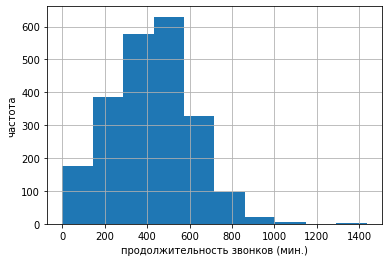

In [ ]:
calls_smart['all_calls_duration'].hist()
plt.xlabel("продолжительность звонков (мин.)")
plt.ylabel("частота");

In [ ]:
# для визуального удобства
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


1. 419 - среднее значение минут разговора, требующееся пользователю, в месяц на тарифе smart
2. 423 - медианное значение минут разговора, требующееся пользователю, в месяц на тарифе smart
3. порядка 99% - совпадение медианы со средним, что говорит о достаточно хорошей однородности данных, без серьезных выбросов
4. среднее меньше медианы - распределение по типу "Пуассона", смещено влево
5. порядка 67% пользователей укладывается в пакет минут

#### calls_ultra

In [ ]:
# медианное значение минут разговора, требующееся пользователю, в месяц на тарифе ultra
median_calls_ultra = calls_ultra['all_calls_duration'].median()
median_calls_ultra

528.0

In [ ]:
# дисперсия
var_calls_ultra = calls_ultra['all_calls_duration'].var()
var_calls_ultra

94203.41839614809

In [ ]:
calls_ultra['all_calls_duration'].describe()

count     951.000000
mean      545.451104
std       306.925754
min         0.000000
25%       310.000000
50%       528.000000
75%       756.500000
max      1673.000000
Name: all_calls_duration, dtype: float64

In [ ]:
print(st.norm(545.451104, 306.925754).cdf(3000))

0.9999999999999993


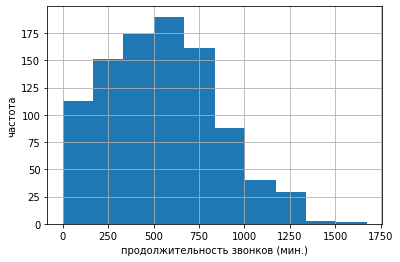

In [ ]:
calls_ultra['all_calls_duration'].hist()
plt.xlabel("продолжительность звонков (мин.)")
plt.ylabel("частота");

In [ ]:
# для визуального удобства
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


1. 545 - среднее значение минут разговора, требующееся пользователю, в месяц на тарифе ultra
2. 528 - медианное значение минут разговора, требующееся пользователю, в месяц на тарифе ultra
3. порядка 97% - совпадение медианы со средним, что говорит о достаточно хорошей однородности данных, без серьезных выбросов
4. среднее больше медианы - распределение по типу "Пуассона", смещено вправо
5. почти 100% пользователей укладывается в пакет минут

#### messages_smart

In [ ]:
# медианное значение количества сообщений, требующееся пользователю, в месяц на тарифе smart
median_messages_smart = messages_smart['messages_count'].median()
median_messages_smart

34.0

In [ ]:
# дисперсия
var_messages_smart = messages_smart['messages_count'].var()
var_messages_smart

717.5942011753527

In [ ]:
messages_smart['messages_count'].describe()

count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: messages_count, dtype: float64

In [ ]:
print(st.norm(38.716441, 26.787949).cdf(50))

0.6632019496898764


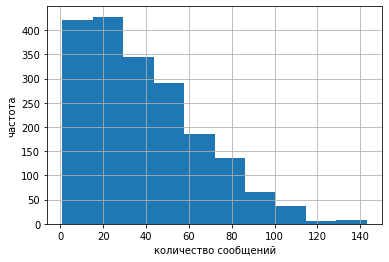

In [ ]:
messages_smart['messages_count'].hist()
plt.xlabel("количество сообщений")
plt.ylabel("частота");

In [ ]:
# для визуального удобства
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


1. 39 - среднее значение количества сообщений, требующееся пользователю, в месяц на тарифе smart
2. 34 - медианное значение количества сообщений, требующееся пользователю, в месяц на тарифе smart
3. порядка 87% - совпадение медианы со средним, что говорит о достаточно хорошей однородности данных, без серьезных выбросов
4. среднее больше медианы - распределение по типу "Пуассона", смещено вправо
5. порядка 66% пользователей укладывается в пакет сообщений

#### messages_ultra

In [ ]:
# медианное значение количества сообщений, требующееся пользователю, в месяц на тарифе ultra
median_messages_ultra = messages_ultra['messages_count'].median()
median_messages_ultra

51.0

In [ ]:
# дисперсия
var_messages_ultra = messages_ultra['messages_count'].var()
var_messages_ultra

2109.659182865204

In [ ]:
messages_ultra['messages_count'].describe()

count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
Name: messages_count, dtype: float64

In [ ]:
print(st.norm(61.161006, 45.931026).cdf(1000))

1.0


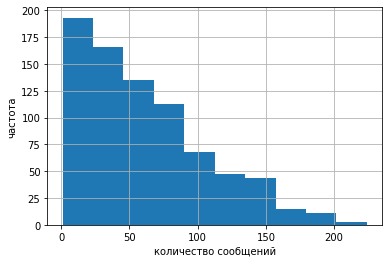

In [ ]:
messages_ultra['messages_count'].hist()
plt.xlabel("количество сообщений")
plt.ylabel("частота");

In [ ]:
# для визуального удобства
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


1. 61 - среднее значение количества сообщений, требующееся пользователю, в месяц на тарифе ultra
2. 51 - медианное значение количества сообщений, требующееся пользователю, в месяц на тарифе ultra
3. порядка 84% - совпадение медианы со средним, что говорит о достаточно хорошей однородности данных, без серьезных выбросов
4. среднее больше медианы - распределение по типу "Пуассона", смещено вправо
5. 100% пользователей укладывается в пакет сообщений

#### internet_smart

In [ ]:
# медианное значение количества интернета, требующееся пользователю, в месяц на тарифе smart
median_internet_smart = internet_smart['all_mb_used'].median()
median_internet_smart

16507.739999999998

In [ ]:
# дисперсия
var_internet_smart = internet_smart['all_mb_used'].var()
var_internet_smart

34359951.68228318

In [ ]:
internet_smart['all_mb_used'].describe()

count     2228.000000
mean     16215.661849
std       5861.736234
min          0.000000
25%      12649.272500
50%      16507.740000
75%      20043.792500
max      38552.450000
Name: all_mb_used, dtype: float64

In [ ]:
print(st.norm(16215.661849, 5861.736234).cdf(15360))

0.44197090532497296


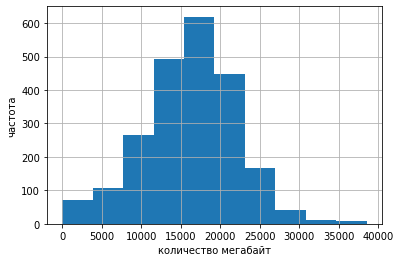

In [ ]:
internet_smart['all_mb_used'].hist()
plt.xlabel("количество мегабайт")
plt.ylabel("частота");

In [ ]:
# для визуального удобства
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


1. 16216 - среднее значение количества интернета, требующееся пользователю, в месяц на тарифе smart
2. 16508 - медианное значение количества интернета, требующееся пользователю, в месяц на тарифе smart
3. порядка 98% - совпадение медианы со средним, что говорит о достаточно хорошей однородности данных, без серьезных выбросов
4. среднее меньше медианы - распределение по типу "Пуассона", смещено влево
5. порядка 44% пользователей укладывается в пакет интернета

#### internet_ultra

In [ ]:
# медианное значение количества интернета, требующееся пользователю, в месяц на тарифе ultra
median_internet_ultra = internet_ultra['all_mb_used'].median()
median_internet_ultra

19394.29

In [ ]:
# дисперсия
var_internet_ultra = internet_ultra['all_mb_used'].var()
var_internet_ultra

98864248.95263141

In [ ]:
internet_ultra['all_mb_used'].describe()

count      975.000000
mean     19668.485262
std       9943.050284
min          0.000000
25%      12008.305000
50%      19394.290000
75%      26896.550000
max      49745.690000
Name: all_mb_used, dtype: float64

In [ ]:
print(st.norm(19668.485262, 9943.050284).cdf(30720))

0.8668193886814328


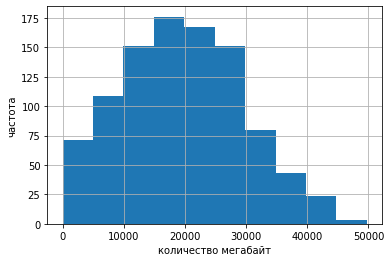

In [ ]:
internet_ultra['all_mb_used'].hist()
plt.xlabel("количество мегабайт")
plt.ylabel("частота");

In [ ]:
# для визуального удобства
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


1. 19668 - среднее значение количества интернета, требующееся пользователю, в месяц на тарифе ultra
2. 19394 - медианное значение количества интернета, требующееся пользователю, в месяц на тарифе ultra
3. порядка 99% - совпадение медианы со средним, что говорит о достаточно хорошей однородности данных, без серьезных выбросов
4. среднее больше медианы - распределение по типу "Пуассона", смещено вправо
5. порядка 87% пользователей укладывается в пакет интернета

### Вывод:

1. Пользователи тарифа ultra на 23% больше тратят минут, чем пользователи тарифа smart, при этом почти 100% пользователей тарифа ultra укладывается в пакет минут, а порядка 33% пользователей тарифа smart не укладывается в пакет минут.

2. Пользователи тарифа ultra на 36% больше тратят сообщений, чем пользователи тарифа smart, при этом 100% пользователей тарифа ultra укладывается в пакет сообщений, а порядка 34% пользователей тарифа smart не укладывается в пакет сообщений.

3. Пользователи тарифа ultra на 18% больше тратят интернета, чем пользователи тарифа smart, при этом порядка 87% пользователей тарифа ultra укладывается в пакет трафика, а порядка 56% пользователей тарифа smart не укладывается в пакет трафика.

## Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

In [ ]:
# СПРАВОЧНО: средняя выручка пользователей тарифа «Смарт»
revenue_pivot_smart['all_revenue'].mean()

1289.9735307312696

In [ ]:
# дисперсия
var_revenue_pivot_smart = revenue_pivot_smart['all_revenue'].var()
var_revenue_pivot_smart

669785.7080064153

In [ ]:
# СПРАВОЧНО: средняя выручка пользователей тарифа «Ультра»
revenue_pivot_ultra['all_revenue'].mean()

2070.1522842639592

In [ ]:
# дисперсия
var_revenue_pivot_ultra = revenue_pivot_ultra['all_revenue'].var()
var_revenue_pivot_ultra

141516.745078617

*H0: гипотеза о равенстве средней выручки пользователей тарифов «Ультра» и «Смарт»*

*H1: гипотеза о неравенстве средней выручки пользователей тарифов «Ультра» и «Смарт»*

*Примечание:*
1. параметр equal_var = False, так как дисперсии не равны
2. проверяем гипотезу о равенстве средних двух генеральных совокупностей

In [ ]:
sample_1 = revenue_pivot_smart['all_revenue']
sample_2 = revenue_pivot_ultra['all_revenue']

alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


#### Вывод

При условии, что средние выручки пользователей тарифов «Ультра» и «Смарт» равны, вероятность получить такие или еще более выраженные различия составила 4.2606313931076085e-250. Отвергаем нулевую гипотезу о равенстве средней выручки пользователей тарифов «Ультра» и «Смарт».

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [ ]:
# СПРАВОЧНО: средняя выручка пользователей тарифа «Смарт» (из Москвы)
msk_revenue_pivot_smart = revenue_pivot_smart.query('city == "москва"')
msk_revenue_pivot_smart['all_revenue'].mean()

1239.3575129533679

In [ ]:
# дисперсия
var_msk_revenue_pivot_smart = msk_revenue_pivot_smart['all_revenue'].var()
var_msk_revenue_pivot_smart

567691.7523719792

In [ ]:
# СПРАВОЧНО: средняя выручка пользователей тарифа «Смарт» (не из Москвы)
not_msk_revenue_pivot_smart = revenue_pivot_smart.query('city != "москва"')
not_msk_revenue_pivot_smart['all_revenue'].mean()

1300.5746066196418

In [ ]:
# дисперсия
var_not_msk_revenue_pivot_smart = not_msk_revenue_pivot_smart['all_revenue'].var()
var_not_msk_revenue_pivot_smart

690838.8634590573

*H0: гипотеза о равенстве средней выручки пользователей из Москвы и других городов на тарифе «Смарт»*

*H1: гипотеза о неравенстве средней выручки пользователей из Москвы и других городов на тарифе «Смарт»*

*Примечание:*
1. параметр equal_var = False, так как дисперсии не равны
2. проверяем гипотезу о равенстве средних двух генеральных совокупностей

In [ ]:
sample_1 = msk_revenue_pivot_smart['all_revenue']
sample_2 = not_msk_revenue_pivot_smart['all_revenue']

alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.15468343176376667
Не получилось отвергнуть нулевую гипотезу


#### Вывод

При условии, что средние выручки пользователей из Москвы и других городов на тарифе «Смарт» равны, вероятность получить такие или еще более выраженные различия составила 0.15468343176376667. Принимаем нулевую гипотезу о равенстве средней выручки пользователей из Москвы и других городов на тарифе «Смарт».

In [ ]:
# СПРАВОЧНО: средняя выручка пользователей тарифа «Ультра» (из Москвы)
msk_revenue_pivot_ultra = revenue_pivot_ultra.query('city == "москва"')
msk_revenue_pivot_ultra['all_revenue'].mean()

2074.0

In [ ]:
# дисперсия
var_msk_revenue_pivot_ultra = msk_revenue_pivot_ultra['all_revenue'].var()
var_msk_revenue_pivot_ultra

122568.75

In [ ]:
# СПРАВОЧНО: средняя выручка пользователей тарифа «Ультра» (не из Москвы)
not_msk_revenue_pivot_ultra = revenue_pivot_ultra.query('city != "москва"')
not_msk_revenue_pivot_ultra['all_revenue'].mean()

2069.0131578947367

In [ ]:
# дисперсия
var_not_msk_revenue_pivot_ultra = not_msk_revenue_pivot_ultra['all_revenue'].var()
var_not_msk_revenue_pivot_ultra

147289.53869357053

*H0: гипотеза о равенстве средней выручки пользователей из Москвы и других городов на тарифе «Ультра»*

*H1: гипотеза о неравенстве средней выручки пользователей из Москвы и других городов на тарифе «Ультра»*

*Примечание:*
1. параметр equal_var = False, так как дисперсии не равны
2. проверяем гипотезу о равенстве средних двух генеральных совокупностей

In [ ]:
sample_1 = msk_revenue_pivot_ultra['all_revenue']
sample_2 = not_msk_revenue_pivot_ultra['all_revenue']

alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.8544997530689904
Не получилось отвергнуть нулевую гипотезу


#### Вывод

При условии, что средние выручки пользователей из Москвы и других городов на тарифе «Ультра» равны, вероятность получить такие или еще более выраженные различия составила 0.8544997530689904. Принимаем нулевую гипотезу о равенстве средней выручки пользователей из Москвы и других городов на тарифе «Ультра».

## Общий вывод

### В результате предобработки:

1. Установлено, что пропущенных значений в столбце data_users['churn_date'] порядка 0.92. Это очень много. Тип - дата, заполнить средними значениями не получится. Пропуски вызваны скорее всего тем, что данных о смене тарифа - "НЕТ" и им все еще пользуются. Целесообразно заполнить нулями.
2. Столбец "reg_date" и "churn_date" переведен в тип дата.
3. К столбцу "message_date" применен тип данных - дата.
4. К столбцу "session_date" применен тип данных - дата.
5. Удален столбец, дублирующий индексы.
6. К столбцу "call_date" применен тип данных - дата.

### В результате анализа поведения клиентов оператора установлено следующее:
1. Пользователи тарифа ultra на 23% больше тратят минут, чем пользователи тарифа smart, при этом почти 100% пользователей тарифа ultra укладывается в пакет минут, а порядка 33% пользователей тарифа smart не укладывается в пакет минут.

2. Пользователи тарифа ultra на 36% больше тратят сообщений, чем пользователи тарифа smart, при этом 100% пользователей тарифа ultra укладывается в пакет сообщений, а порядка 34% пользователей тарифа smart не укладывается в пакет сообщений.

3. Пользователи тарифа ultra на 18% больше тратят интернета, чем пользователи тарифа smart, при этом порядка 87% пользователей тарифа ultra укладывается в пакет трафика, а порядка 56% пользователей тарифа smart не укладывается в пакет трафика.
   
### Проверка гипотез показала следующее:
1. Отвергаем гипотезу о равенстве средней выручки пользователей тарифов «Ультра» и «Смарт»
2. Принимаем гипотезу о равенстве средней выручки пользователей из Москвы и других городов на тарифе «Смарт»
3. Принимаем гипотезу о равенстве средней выручки пользователей из Москвы и других городов на тарифе «Ультра»

### Более прибыльный тариф 
Тариф Ultra приносит больше прибыли, чем тариф Smart в среднем на 40% в год и 38% в месяц с каждого среднестатистического пользователя.